In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Zad 

* Proszę pobrać dowolny obrazek. 

* Dodajmy do obrazu szum.

* Otwórzmy go w pythonie w skali szarości i przekonwertujmy do numpy array.

* Załóżmy że jego rozdzielczość to $m$ na $n$. Potraktujmy go jako $m$ wektorów $n$ wymiarowych.

* Zredukujmy dane za pomocą SVD z $n$ wymiarów do $k$ wymiarów (proszę rozważyć różne $k$). 

* Zrekonstruujmy teraz obraz z wymiaru $k$ do oryginalnego wymiaru i zobaczmy jak wyglądają.


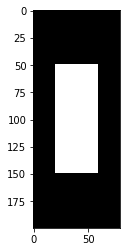

(array([  0,   0,   0, ..., 199, 199, 199]), array([ 0,  2,  7, ..., 69, 72, 74]))


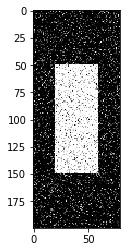

In [2]:
np.set_printoptions()
x = np.zeros((200,80))
x[50:150,20:60] = 1

plt.gray()
plt.imshow(x)
plt.show()

#zaszumiamy:
losowe_indeksy = np.random.choice(2,size=x.shape,p=[0.5,0.5]).nonzero()
print(losowe_indeksy)
x[losowe_indeksy] = x[losowe_indeksy] + np.random.normal(0,0.4,len(losowe_indeksy[0]))
x[x>1] = 1 # zeby pozbyc sie ujemnych
x[x<0] = 0
plt.gray()
plt.imshow(x)
plt.show()

ZZ1 = x

Wykonaj rozkład SVD oraz narysuj wykres zawierający wartości macierzy $S$ (wartości własne).

In [3]:
from sklearn.decomposition import TruncatedSVD as svd

In [4]:
U, s, V = np.linalg.svd(x, full_matrices=True)

print("U:\n", U)
S = np.zeros((x.shape[0], x.shape[1]))
# populate Sigma with n x n diagonal matrix
S[:x.shape[1], :x.shape[1]] = np.diag(s)
print("S\n", S)
print("V^T:\n", V)

U:
 [[-0.00716112  0.07262085 -0.02434378 ...  0.01960697 -0.04421846
   0.0020907 ]
 [-0.01340504  0.14939266 -0.12846964 ... -0.06976658  0.03921284
  -0.0342771 ]
 [-0.00779461  0.09391043  0.03569917 ...  0.03306521  0.04339985
  -0.02018216]
 ...
 [-0.0079052   0.05957431  0.0143687  ...  0.61400535 -0.00312166
  -0.02845881]
 [-0.00296259  0.03100717 -0.00374316 ... -0.0016205   0.77685838
  -0.00634608]
 [-0.00463317  0.09121573 -0.00551177 ... -0.00958675  0.00324007
   0.71081616]]
S
 [[58.95415373  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          5.61320256  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          4.03801999 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
V^T:
 [[-0.01655496 -0.018273   -0.01261964 ... -0.019674

In [5]:
svd_model = svd(n_components=3)
X_new = svd_model.fit_transform(x)

In [6]:
df_new=pd.DataFrame(X_new)
# sns.pairplot(df_new)
plt.plot(s)
plt.xlim([0,10])
plt.show()

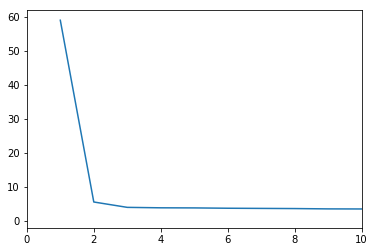

[58.95415373  5.61320256  4.03801999  3.90654853  3.87662707  3.78067733
  3.7319761   3.68499169  3.59065331  3.56631053  3.53853134  3.44303081
  3.39397984  3.31543546  3.28104854  3.25134837  3.20448979  3.13141373
  3.1001058   3.08687031  3.05414464  2.99599685  2.94825028  2.92005236
  2.89354514  2.83830425  2.83534937  2.80858852  2.73112653  2.70043311
  2.6892449   2.59870285  2.59329919  2.54966049  2.54216916  2.47305329
  2.44859652  2.42035786  2.36345018  2.34297561  2.3345427   2.32636126
  2.2814537   2.24017791  2.22477201  2.17221523  2.13011467  2.08604343
  2.06519226  2.03022815  2.01975397  1.98201977  1.95574106  1.93095213
  1.91070568  1.86921267  1.83992477  1.79774669  1.75844088  1.72496041
  1.71421935  1.69776118  1.64616709  1.59489889  1.54919618  1.51696239
  1.50109429  1.47690902  1.42807222  1.41164306  1.39002168  1.3397131
  1.29151351  1.25775009  1.21459271  1.18230832  1.13855214  1.07118359
  1.05780925  0.94033231]


In [7]:
# rozwiązanie Przemka
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x)
np.fill_diagonal(S,s)
plt.plot(range(1,len(s)+1),s)
plt.xlim([0,10])
plt.show()
print(s)
# wartości dla S, chcemy usunąć te gdzie jest największe załamanie, czyli bierzemy do s = 3, wszystkie kolejne nic nie wnoszą
# oryginalny wykres

Odtwórz obrazek zerując wszystkie po za 3 pierwszymi wartościami

In [8]:
k = 3
s_uciete= np.zeros(s.size)
s_uciete[:k] = s[:k] # wypelnienie listy s_u wartosciami z s ktore nie sa zerowe
S = np.zeros((x.shape[0], x.shape[1]))
S[:x.shape[1], :x.shape[1]] = np.diag(s_uciete)

In [9]:
s_uciete

array([58.95415373,  5.61320256,  4.03801999,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [10]:
X_new = np.dot(np.dot(U,S),V)
X_new

array([[ 0.0473504 ,  0.0189936 ,  0.04678644, ...,  0.04146976,
         0.05048507,  0.03859852],
       [ 0.12660818, -0.051573  ,  0.0804524 , ...,  0.09879914,
         0.08549189,  0.00527835],
       [ 0.0336668 ,  0.09944016,  0.07210194, ...,  0.03904821,
         0.07910812,  0.11052536],
       ...,
       [ 0.02746701,  0.05685034,  0.04637845, ...,  0.02979187,
         0.05052605,  0.06575685],
       [ 0.01753726,  0.01557692,  0.02116223, ...,  0.01632125,
         0.02296114,  0.02253731],
       [ 0.04546692,  0.04768543,  0.06025619, ...,  0.04222426,
         0.06576294,  0.06682742]])

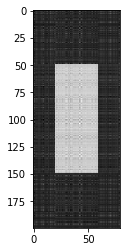

In [11]:
plt.imshow(X_new)
plt.show()

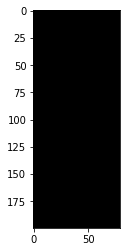

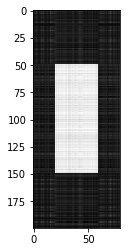

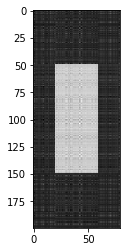

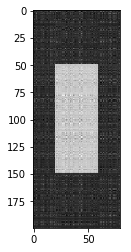

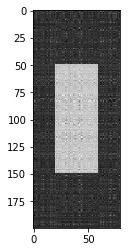

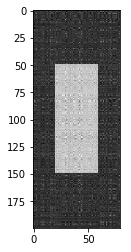

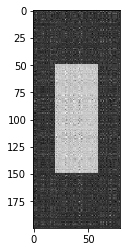

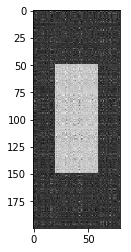

In [12]:
for i in range(10):
    k = i
    s_uciete= np.zeros(s.size)
    s_uciete[:k] = s[:k] # wypelnienie listy s_u wartosciami z s ktore nie sa zerowe
    S = np.zeros((x.shape[0], x.shape[1]))
    S[:x.shape[1], :x.shape[1]] = np.diag(s_uciete)
    X_new = np.dot(np.dot(U,S),V)
    plt.imshow(X_new)
    plt.show()

In [13]:
# rozwiazanie Przemka
k = 3
x2 = np.dot(np.dot(U,S)[:,0:k], V[0:k,:])
x2[x2>1] = 1 # wyniki powyzej 1 ustawiamy na 1
x2[x2<0] = 0 # wyniki ujemne na 0
plt.gray()
plt.imshow(x2)
plt.show()

# Zad
Proszę narysowac wyniki dla 

$$
k = 2, ...10
$$

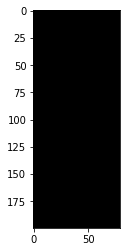

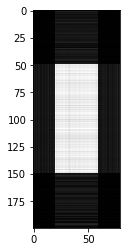

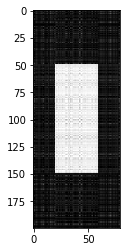

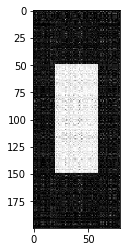

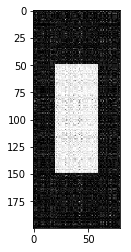

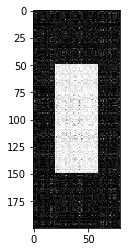

In [14]:
# rozwiązanie Przemka
for i in range(10):
    k = i
    x2 = np.dot(np.dot(U,S)[:,0:k],V[0:k,:])
    x2[x2>1] = 1
    x2[x2<0] = 0
    plt.gray()
    plt.imshow(x2)
    plt.show()

# Zad 

* Proszę teraz potraktować obrazek jako zbiór kostek 8 na 8 - czyli dostajemy wektor 64 wymiarowy. 
* Dokonać tej samej procedury kompresji. Które podejście daje mniejszy błąd od oryginału używając tej samej ilości komponentów (dowolna odlegość po pikselach) - dlaczego?

In [15]:
print(x.shape)

(200, 80)


Obcinamy obrazek, tak by wysokość i szetrokość była podzielna przez 8

In [16]:
h_size = int(x.shape[1]/8) * 8
v_size = int(x.shape[0]/8) * 8

X = x[:v_size, :h_size]

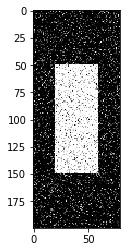

In [17]:
plt.imshow(X, cmap = 'gray')
plt.show()

In [18]:
# Przygotowanie tablicy na kostki 8x8
res = np.zeros((int(X.shape[0]*X.shape[1] / 64) , 64))

In [19]:
# Wypełniamy tablicę
licz = 0
for i in range(0,X.shape[0],8):
    for j in range(0,X.shape[1],8):
        tmp = X[i:i+8, j:j+8].flatten()
        res[licz, :] = tmp
        licz = licz +1

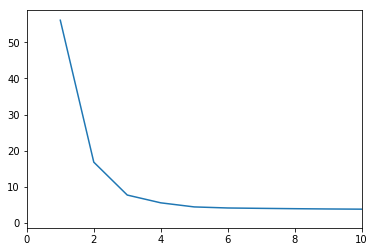

s:  [56.07377711 16.82778638  7.72741498  5.5782376   4.44682339  4.15215987
  4.04857587  3.95639402  3.87825436  3.82477114  3.74679724  3.64785773
  3.62565558  3.54616482  3.51223738  3.4879957   3.41027417  3.36072676
  3.34575127  3.2493839   3.18746633  3.16844436  3.11730877  3.08041776
  3.04558702  3.03324194  2.93885844  2.93817495  2.90092402  2.83056211
  2.78735274  2.7480666   2.69138353  2.68520884  2.63713694  2.59340189
  2.57335148  2.53952011  2.48677767  2.44069141  2.41456757  2.41128188
  2.38781202  2.34159702  2.29935365  2.20914315  2.2000152   2.17820658
  2.15461222  2.09650368  2.08963102  2.02281785  2.00050009  1.96349464
  1.9071201   1.89415322  1.78939675  1.74396708  1.69015552  1.68530009
  1.63181375  1.5560773   1.48435998  1.4047575 ]
S:  [[56.07377711  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         16.82778638  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          7.72741498 ...  0.          0.
   0.   

In [20]:
U, s, V = np.linalg.svd(res)
S = np.zeros_like(res)
np.fill_diagonal(S,s)
plt.plot(range(1,len(s)+1),s)
plt.xlim(0,10)
plt.show()
print('s: ',s)
print('S: ',S)
# powinniśmy wziąć 3,4,5 wspolrzednych

In [21]:
k = 3
x2 = np.dot(np.dot(U,S)[:,0:k], V[0:k,:])
x2[x2>1] = 1 # wyniki powyzej 1 ustawiamy na 1
x2[x2<0] = 0 # wyniki ujemne na 0

# Zad
Proszę narysowac wyniki dla 

$$
k = 2, ...10
$$

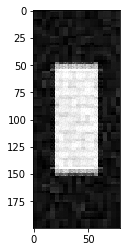

In [22]:
Z = np.zeros((v_size, h_size))

licz = 0

for i in range(0,Z.shape[0],8):
    for j in range(0, Z.shape[1],8):
        Z[i:i+8, j:j+8] = np.reshape(x2[licz], (8,8))
        licz = licz +1
        
plt.gray()
plt.imshow(Z)
plt.show()

ZZ2 = Z
# mamy ponownie złożony obrazek

# Zad

Dla k =3 policz różnicę między oryginałem a powyższymi dwoma przypadkami.

In [23]:
print(np.mean(x[:v_size, :h_size] - ZZ1[:v_size, :h_size])**2)
print(np.mean(x[:v_size, :h_size] - ZZ2[:v_size, :h_size])**2)
# wyniki niedobre

0.0
3.723094650808604e-07
